

# 1.- Instalacion de paquestes y dependencias


In [3]:
!pip install plotly
!pip install mlxtend==0.21.0
!pip install joblib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.1 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importar paquetes

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from google.colab import drive

# 2.- Entendimiento de los Datos

## *LEER* ARCHIVO Y REVISAR DESCRIPCION

In [7]:
# data=pd.read_csv('input/diabetes.csv')
# data.head()

In [8]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [9]:
data =pd.read_csv("/content/drive/MyDrive/proyecto rojo/input/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
nr, nc = data.shape
print (f"Existen {nr} fila and {nc} columnas")

Existen 768 fila and 9 columnas


In [ ]:
data.size
print (f"Existen {data.size} atributos en la  data")

In [12]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
num_columns = data._get_numeric_data().columns

In [14]:
num_columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
data.select_dtypes(include=['object']).columns.tolist()

[]

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
data.describe().round(2).style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.850000,120.890000,69.110000,20.540000,79.800000,31.990000,0.470000,33.240000,0.350000
std,3.370000,31.970000,19.360000,15.950000,115.240000,7.880000,0.330000,11.760000,0.480000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.630000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
data["Outcome"]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Condesacion de los datos

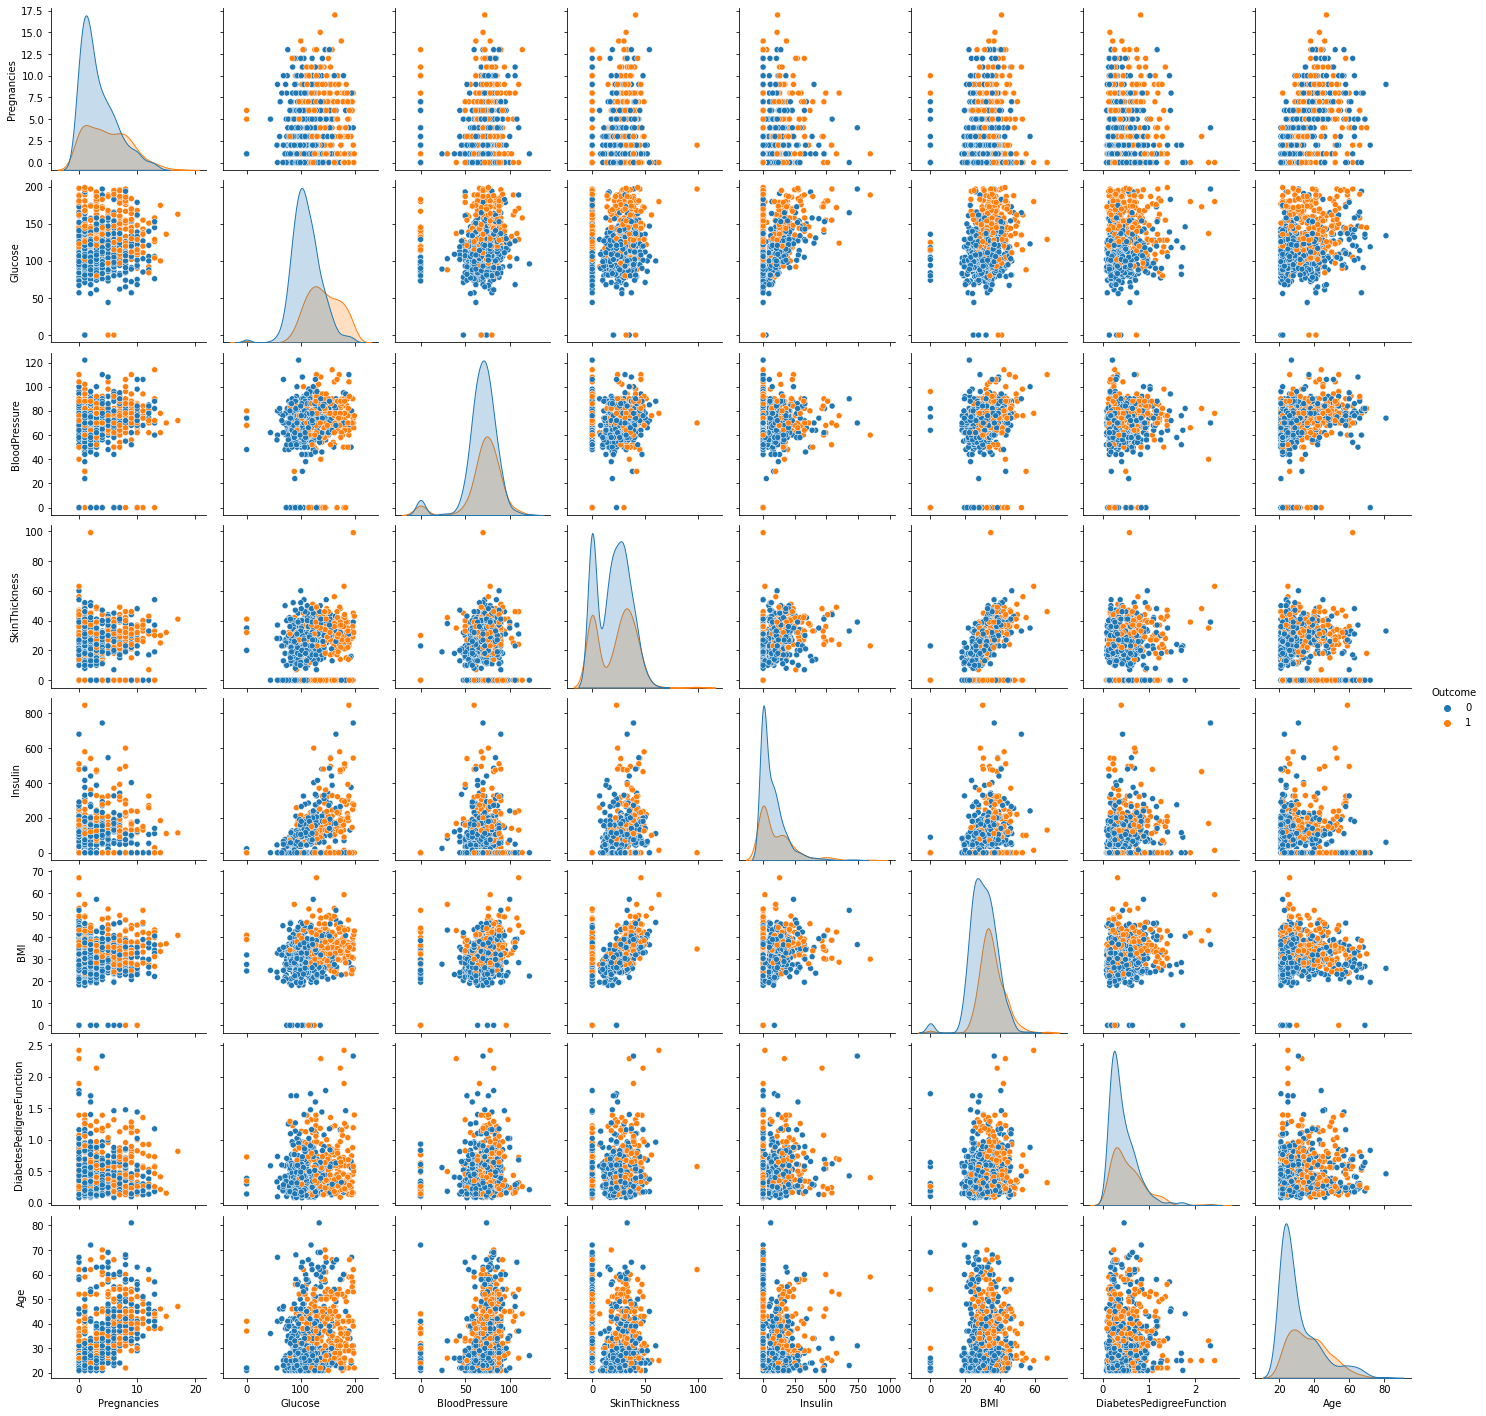

In [19]:
sns.pairplot(data,hue='Outcome')

## Distribuicion de la variable Objetivo

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


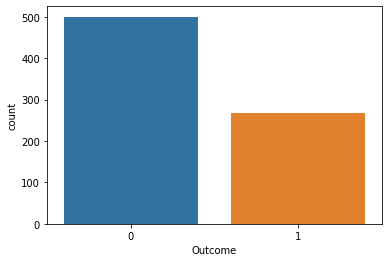

In [20]:
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

sns.countplot(data['Outcome'])
plt.show()

In [21]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [22]:
lis=["No tiene diabates","Si tiene diabetes"]
have_or_not = data["Outcome"].value_counts().tolist()
values = [have_or_not[0], have_or_not[1]]
fig = px.pie(values=data['Outcome'].value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Pocentaje de personas con diabetes y sin diabetes")
fig.show()

## Detectar valores maximos Y minimos


In [23]:
for col in data.columns:
    print("The minimum value fore the columns {} is {} and the maximun value is {}"
          .format(col, data[col].min(), data[col].max()))


The minimum value fore the columns Pregnancies is 0 and the maximun value is 17
The minimum value fore the columns Glucose is 0 and the maximun value is 199
The minimum value fore the columns BloodPressure is 0 and the maximun value is 122
The minimum value fore the columns SkinThickness is 0 and the maximun value is 99
The minimum value fore the columns Insulin is 0 and the maximun value is 846
The minimum value fore the columns BMI is 0.0 and the maximun value is 67.1
The minimum value fore the columns DiabetesPedigreeFunction is 0.078 and the maximun value is 2.42
The minimum value fore the columns Age is 21 and the maximun value is 81
The minimum value fore the columns Outcome is 0 and the maximun value is 1


**Analis de posibles valores nulos**
 <ul>
    <li>  Presion sanguinea no puede ser 0</li>
    <li>  Glucosa no puede ser 0</li>
    <li> SkinThickness no puede ser 0</li>
    <li> Insulin no puede ser 0</li>
    <li> BMI no puede ser 0 </li>
    
  </ul>
  <b>consulta <a> https://fmdiabetes.org/automonitoreo-niveles-glucosa/ </a><b/>

In [24]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 3.- Preparacion de los Datos

## 3.1- Detectar valores nulos

In [25]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

In [26]:
diabetes_dataset = data[(data.BloodPressure != 0) & (data.BMI != 0) & (data.Glucose != 0)]

In [27]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Sustitucion valores nulos  con el valor de la mediana y media

**Revisar  caso de insulnua y revisar eliminar valores nulos**

In [28]:
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median()) # 
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
    data[col] = data[col].fillna(data[col].mean())

In [29]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64



```
# Esto tiene formato de código
```

## 3.2.- Detectar Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

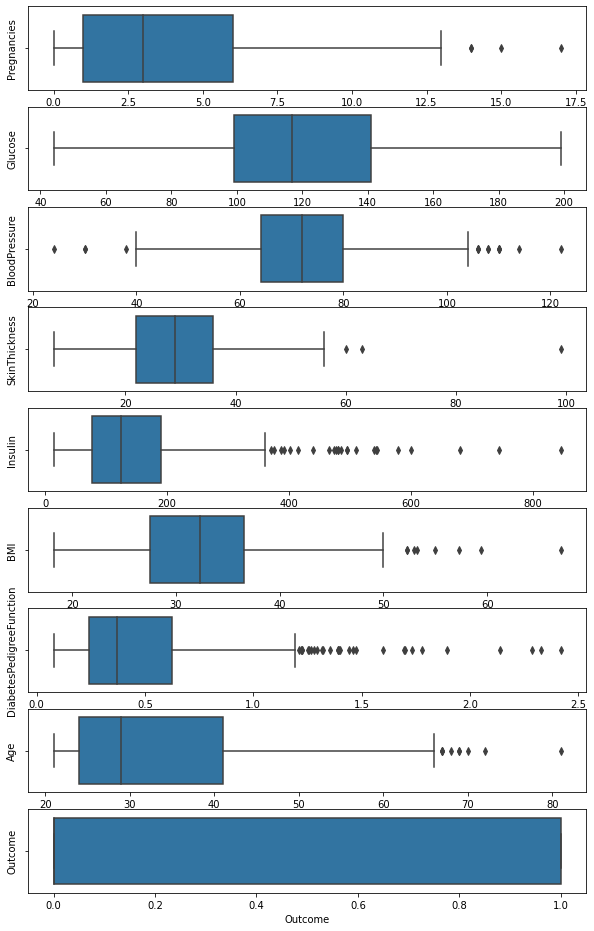

In [30]:
plt.figure(figsize=(10,20))
for i,col in enumerate(num_columns,1):
     plt.subplot(11,1,i)
     sns.boxplot(diabetes_dataset[col])
     plt.ylabel(col)
plt.show()

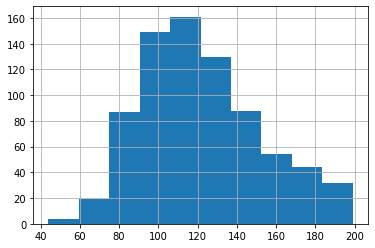

In [31]:
data['Glucose'].hist()

## Calcular Intercuartiles

In [32]:
from scipy.stats import iqr

In [33]:
glucose_iqr_diabetes_n = iqr(data[(data['Outcome']==0) & (data['Glucose']!=0)]['Glucose'],rng=(25,75))

glucose_iqr_diabetes_y = iqr(data[(data['Outcome']==1) & (data['Glucose']!=0)]['Glucose'],rng=(25,75))

In [34]:
print ("intercuantil para glucosas sin diabetes {} y con diabates {}".format(glucose_iqr_diabetes_n,glucose_iqr_diabetes_y))

intercuantil para glucosas sin diabetes 32.0 y con diabates 48.0


In [35]:
Insulin_iqr_diabetes_n = iqr(data[(data['Outcome']==0) & (data['Insulin']!=0)]['Insulin'],rng=(25,75))

Insulin_iqr_diabetes_y = iqr(data[(data['Outcome']==1) & (data['Insulin']!=0)]['Insulin'],rng=(25,75))

In [36]:
print ("intercuantil para valores de insulina sin diabetes {} y con diabates {}".format(Insulin_iqr_diabetes_n,Insulin_iqr_diabetes_y))

intercuantil para valores de insulina sin diabetes 30.0 y con diabates 42.25


### Outliers Glucosa y Insulina

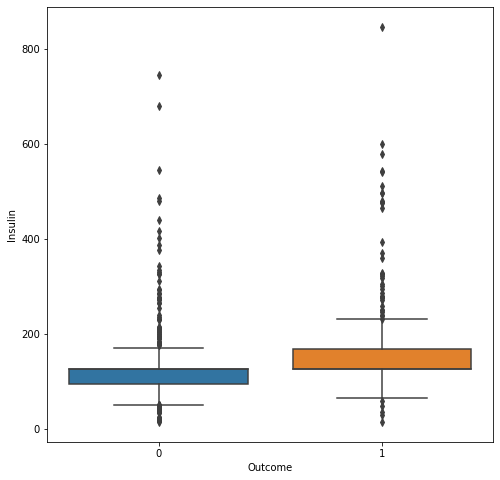

In [37]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Outcome',y='Insulin',data=data)

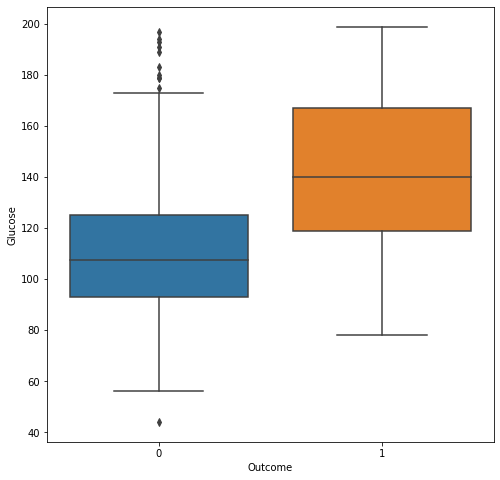

In [38]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Outcome',y='Glucose',data=data)

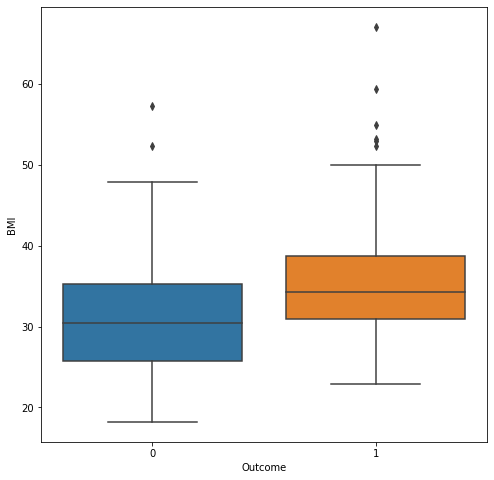

In [39]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Outcome',y='BMI',data=data)

In [40]:
glucosa_outliers=data[data['Glucose']>180]

In [41]:
glucosa_outliers[glucosa_outliers['Outcome']==1].count()

Pregnancies                 35
Glucose                     35
BloodPressure               35
SkinThickness               35
Insulin                     35
BMI                         35
DiabetesPedigreeFunction    35
Age                         35
Outcome                     35
dtype: int64

In [42]:
glucosa_outliers[glucosa_outliers['Outcome']==0].count()

Pregnancies                 6
Glucose                     6
BloodPressure               6
SkinThickness               6
Insulin                     6
BMI                         6
DiabetesPedigreeFunction    6
Age                         6
Outcome                     6
dtype: int64

In [43]:
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [45]:
data.duplicated().sum()

0

## Correlacion De variables

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



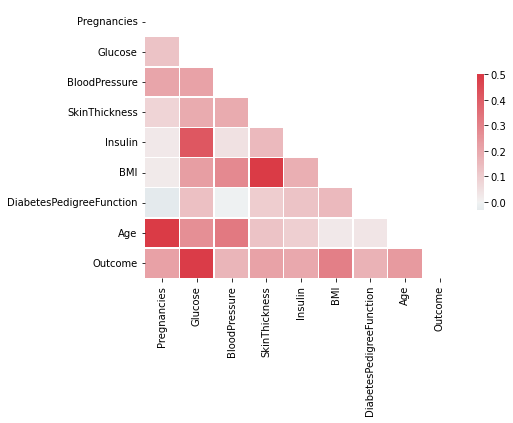

In [46]:
corr=data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(7, 5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, linewidths=.5, cbar_kws={"shrink": .5})

## 3.2 Feature selection

### Univariate Selection
---



In [47]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split



In [48]:
# importing the models

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

In [49]:
x = data.drop(['Outcome'] , axis = 1)
y = data['Outcome' ]
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.2 , random_state=5)

In [50]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
140,3,128.0,78.0,29.15342,125.0,21.1,0.268,55
358,12,88.0,74.0,40.00000,54.0,35.3,0.378,48
143,10,108.0,66.0,29.15342,125.0,32.4,0.272,42
674,8,91.0,82.0,29.15342,125.0,35.6,0.587,68
121,6,111.0,64.0,39.00000,125.0,34.2,0.260,24
...,...,...,...,...,...,...,...,...
73,4,129.0,86.0,20.00000,270.0,35.1,0.231,23
400,4,95.0,64.0,29.15342,125.0,32.0,0.161,31
118,4,97.0,60.0,23.00000,125.0,28.2,0.443,22
701,6,125.0,78.0,31.00000,125.0,27.6,0.565,49


In [51]:
selector = SelectKBest(f_classif, k=3)
selector.fit(x_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

In [52]:
scores.max()

1.0

In [53]:
x.shape[-1]

8

In [54]:
print("Score List:",scores)
print("Feature list", x_train.columns)

Score List: [0.24636841 1.         0.0985046  0.18689397 0.19338647 0.33549587
 0.14330579 0.28704094]
Feature list Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


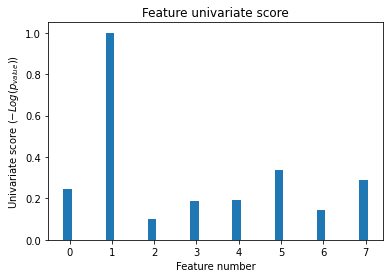

In [55]:

X_indices = np.arange(x.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

In [56]:
print("Score List:",scores)
print("Feature list", x_train.columns)

Score List: [0.24636841 1.         0.0985046  0.18689397 0.19338647 0.33549587
 0.14330579 0.28704094]
Feature list Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


### Sequencital Feture  Selector

In [57]:
#calling the linear regression model
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=3, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [58]:
sfs1 = sfs1.fit(x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2022-11-13 00:03:41] Features: 1/3 -- score: -0.17311495646464525[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2022-11-13 00:03:41] Features: 2/3 -- score: -0.1638895068318647[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished

[2022-11-13 00:03:41] Features: 3/3 -- score: -0.158139512142081

In [59]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['Pregnancies', 'Glucose', 'BMI']


# 4.- Modelo

## Split Data

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x = data.drop(['Outcome'] , axis = 1).values
y = data['Outcome' ].values
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.2 , random_state=42)

**42 es numero magico **

##Implentacion Modelo SVM

In [96]:
from sklearn.datasets import make_classification
from sklearn import svm

clf = svm.SVC(kernel='precomputed')
# linear kernel computation
gram_train = np.dot(x_train, x_train.T)
clf.fit(gram_train, y_train)
# predict on training examples
gram_test = np.dot(x_test, x_train.T)
svm_predict = clf.predict(gram_test)
#prediction = clf.predict(x_test)

In [63]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



## Modelo 2 Regresion **Lineal**

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [74]:
pred2=logreg.predict(x_test)

In [75]:
pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [76]:
from sklearn import metrics 

In [133]:
print("Accuracy:",metrics.accuracy_score(y_test, pred2))
print("Precision:",metrics.precision_score(y_test, pred2))
print("Recall:",metrics.recall_score(y_test, pred2))

Accuracy: 0.7792207792207793
Precision: 0.7058823529411765
Recall: 0.6545454545454545


Text(0.5, 257.44, 'Predicted label')

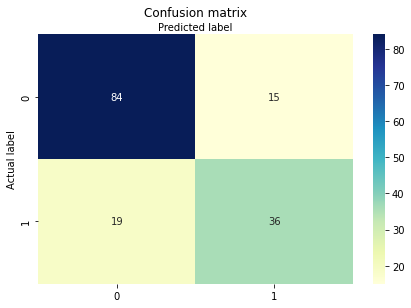

In [70]:
cnf_matrix = metrics.confusion_matrix(y_test, pred2)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

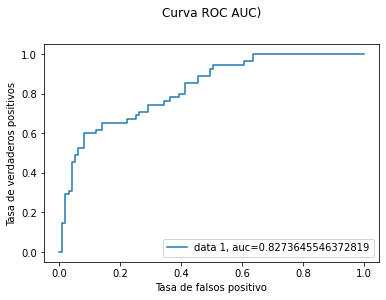

In [142]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_score = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc_score))
plt.title('Curva ROC AUC)', y=1.1)
plt.xlabel('Tasa de falsos positivo')
plt.ylabel('Tasa de verdaderos positivos')
plt.legend(loc=4)
plt.show()

## Evaluacion de modelos

In [143]:
def algorithm_comparison(x_train, y_train, x_test,models):
    
    # Lista con los modelos a instanciar
    #models = [SVM, NMF, TruncatedSVD]
    # Lista para guardar la imagen transformada
    results = []
    
    # Iteración de las instancias de los modelos
    for i in models:
        # Entrenamiento del modelo tomando la cantidad de componentes
        m = i(x_train, y_train)

        m_predict = m.predict(x_test, x_train.T)

        results.append()
        
        
    print ('3 dimentional reduction algorithms with compressing of ')
 
        
    return results

In [144]:
models =[LogisticRegression] 

In [145]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.svm import SVC

In [146]:
models = []
models.append(('LR', LogisticRegression()))

models.append(('SVM', SVC()))
    

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

LR: 0.762136 (0.036729)
SVM: 0.758937 (0.036303)


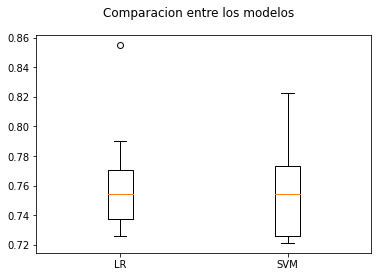

In [147]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=None)
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparacion entre los modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [125]:
results

[array([0.72580645, 0.79032258, 0.85483871, 0.72580645, 0.73770492,
        0.7704918 , 0.75409836, 0.73770492, 0.7704918 , 0.75409836]),
 array([0.72580645, 0.77419355, 0.82258065, 0.72580645, 0.72131148,
        0.81967213, 0.75409836, 0.72131148, 0.7704918 , 0.75409836])]

In [149]:
models = [
    
    linear_model.LogisticRegressionCV(),
    svm.SVC(probability=True),
    neighbors.KNeighborsClassifier(),

]

In [150]:
models_columns = []
models_compare = pd.DataFrame(columns = models_columns)

row_index = 0
for alg in models:  
    print (alg)
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    name = alg.__class__.__name__
    models_compare.loc[row_index,'Model used'] = name
    models_compare.loc[row_index, 'Train Accuracy'] = alg.score(x_train, y_train)
    models_compare.loc[row_index, 'Test Accuracy'] = alg.score(x_test, y_test)
    models_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    models_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    models_compare.loc[row_index, 'AUC'] = auc(fp, tp)

    row_index+=1
    
models_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
models_compare

LogisticRegressionCV()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

SVC(probability=True)
KNeighborsClassifier()


,Model used,Train Accuracy,Test Accuracy,Precission,Recall,AUC
1,SVC,0.768730,0.766234,0.720930,0.563636,0.721212
0,LogisticRegressionCV,0.768730,0.753247,0.666667,0.618182,0.723232
2,KNeighborsClassifier,0.812704,0.675325,0.539683,0.618182,0.662626


#otros

otros


In [ ]:
plt.figure(figsize=(4,4))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sns.distplot(data['Insulin'],color ="DarkSeaGreen" )

In [ ]:
scaler = MinMaxScaler()

In [ ]:
sns.distplot(data['Glucose'],color ="DarkSlateBlue" )

In [ ]:
scaler.fit(x_train)

In [ ]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
r, c = x_train.shape
r2 ,c2 = x_test.shape
print (f"x_train = {r} and y_train = {y_train.shape} ")
print (f"x_test = {r2} and y_test = {y_test.shape} ")

## Create Model

In [ ]:
fig = px.bar(data['Age'].value_counts(), height=400, width = 700) 
fig.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

In [ ]:

model.add(Dense(20,activation='relu'))

model.add(Dense(20,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train,batch_size=10,epochs=200)

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
prediction = model.predict(x_test)
prediction  = [1 if y>=0.5 else 0 for y in prediction] 


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction))

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mean_abs_error=mean_absolute_error(prediction,y_test)
mean_abs_error

In [ ]:
np.sqrt(mean_squared_error(y_test,prediction))

In [ ]:
model.evaluate(x_test,y_test)